<a href="https://colab.research.google.com/github/gatimo256/project2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing
1) Source of data

- Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

2) Brief description of data
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

3) What is the target?
- The  goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

4) Is this a classification or regression problem?
- This is a classification Problem

5) How many features?
- 17 Features

6) How many rows of data.
- 4521

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- Cleaning
  - None
- Exploring
 - Correlation
 - Visualization 
- Preprocessing
  - Scaling
  - OneHotEncoding of Nominal Features

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load dataset 1 Bank Marketing
path = 'https://drive.google.com/uc?export=download&id=1aMxQETdw7BnfMFLRAz4cmkTShyzzYy4m'
bank_df = pd.read_csv(path, delimiter =';')
bank_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
bank_df.shape

(4521, 17)

Attribute Information:

Bank client data:

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

- Contact: contact communication type (categorical:
'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

- Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
- Previous: number of contacts performed before this campaign and for
this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')


Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [ ]:
#Check for duplicates
bank_df.duplicated().sum()

0

In [ ]:
#check for missing values
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#check for the inconsitent values. 
cols = ['job', 'marital','education','loan','housing','contact','month','poutcome']
for n in cols:
    print(bank_df[n].value_counts().to_markdown())

|               |   job |
|:--------------|------:|
| management    |   969 |
| blue-collar   |   946 |
| technician    |   768 |
| admin.        |   478 |
| services      |   417 |
| retired       |   230 |
| self-employed |   183 |
| entrepreneur  |   168 |
| unemployed    |   128 |
| housemaid     |   112 |
| student       |    84 |
| unknown       |    38 |
|          |   marital |
|:---------|----------:|
| married  |      2797 |
| single   |      1196 |
| divorced |       528 |
|           |   education |
|:----------|------------:|
| secondary |        2306 |
| tertiary  |        1350 |
| primary   |         678 |
| unknown   |         187 |
|     |   loan |
|:----|-------:|
| no  |   3830 |
| yes |    691 |
|     |   housing |
|:----|----------:|
| yes |      2559 |
| no  |      1962 |
|           |   contact |
|:----------|----------:|
| cellular  |      2896 |
| unknown   |      1324 |
| telephone |       301 |
|     |   month |
|:----|--------:|
| may |    1398 |
| jul |    

From the results above, there are number of 'unknown' values in the following columns:
- job
- education
- contact
- poutcome

For exploratory puposes, we will not do anything to these values. We might however drop or impute them later when we build our model. 

# Exploration

In [ ]:
#description of all the numerical categories/features in our dataset.
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


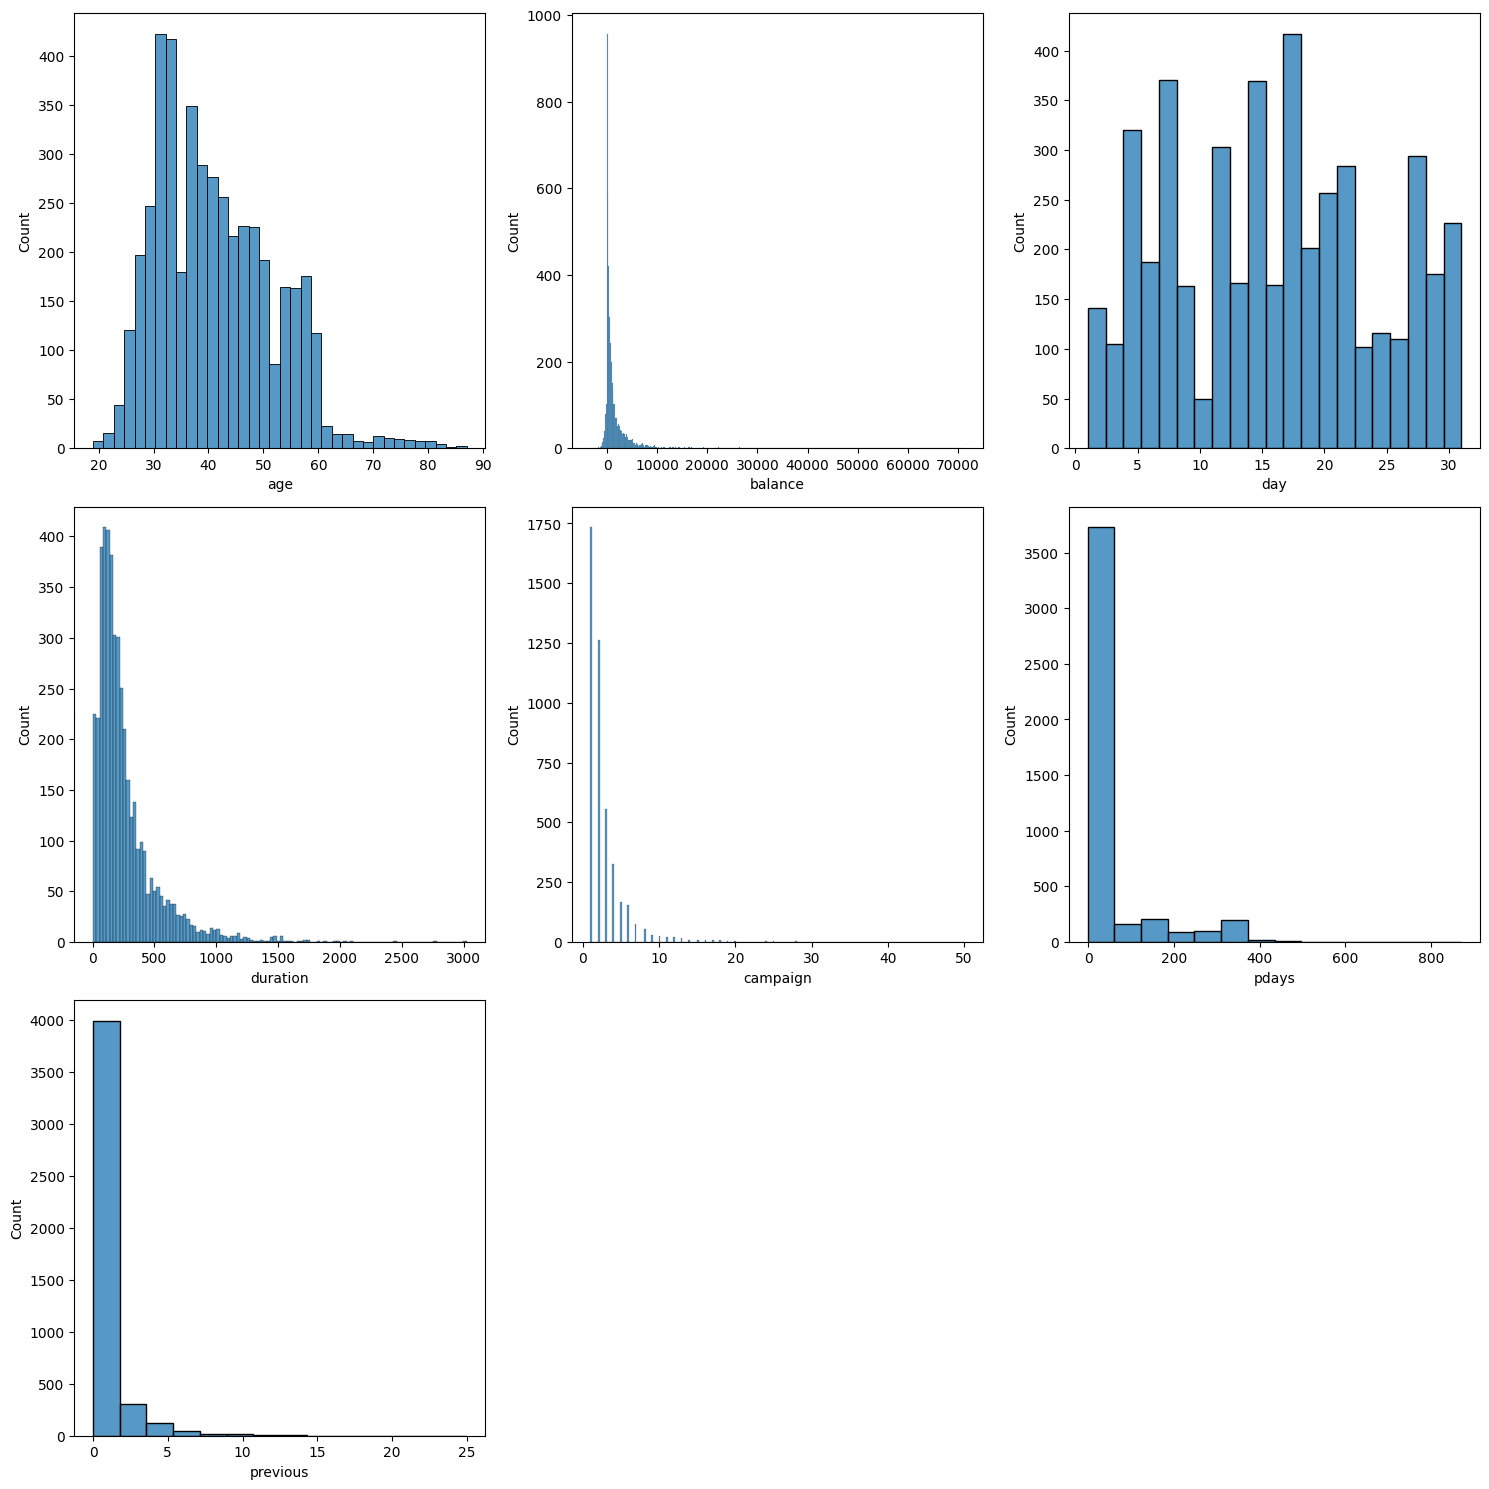

In [ ]:
#create visualization for all the Numerical Columns.
#source code https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f
cols = 3
rows = 3

#select only the numerical
num_cols = bank_df.select_dtypes(include='number').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = bank_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

From the Visualizations above we can make the following observations. 
1. Most Customers are between 25 and 45 years of age, with a few outliers above 80 years of age. 
2. For most customers, the number of contacts required to make a decision, was less than  5. 
3. Most customers have a balance of below 5000 USD

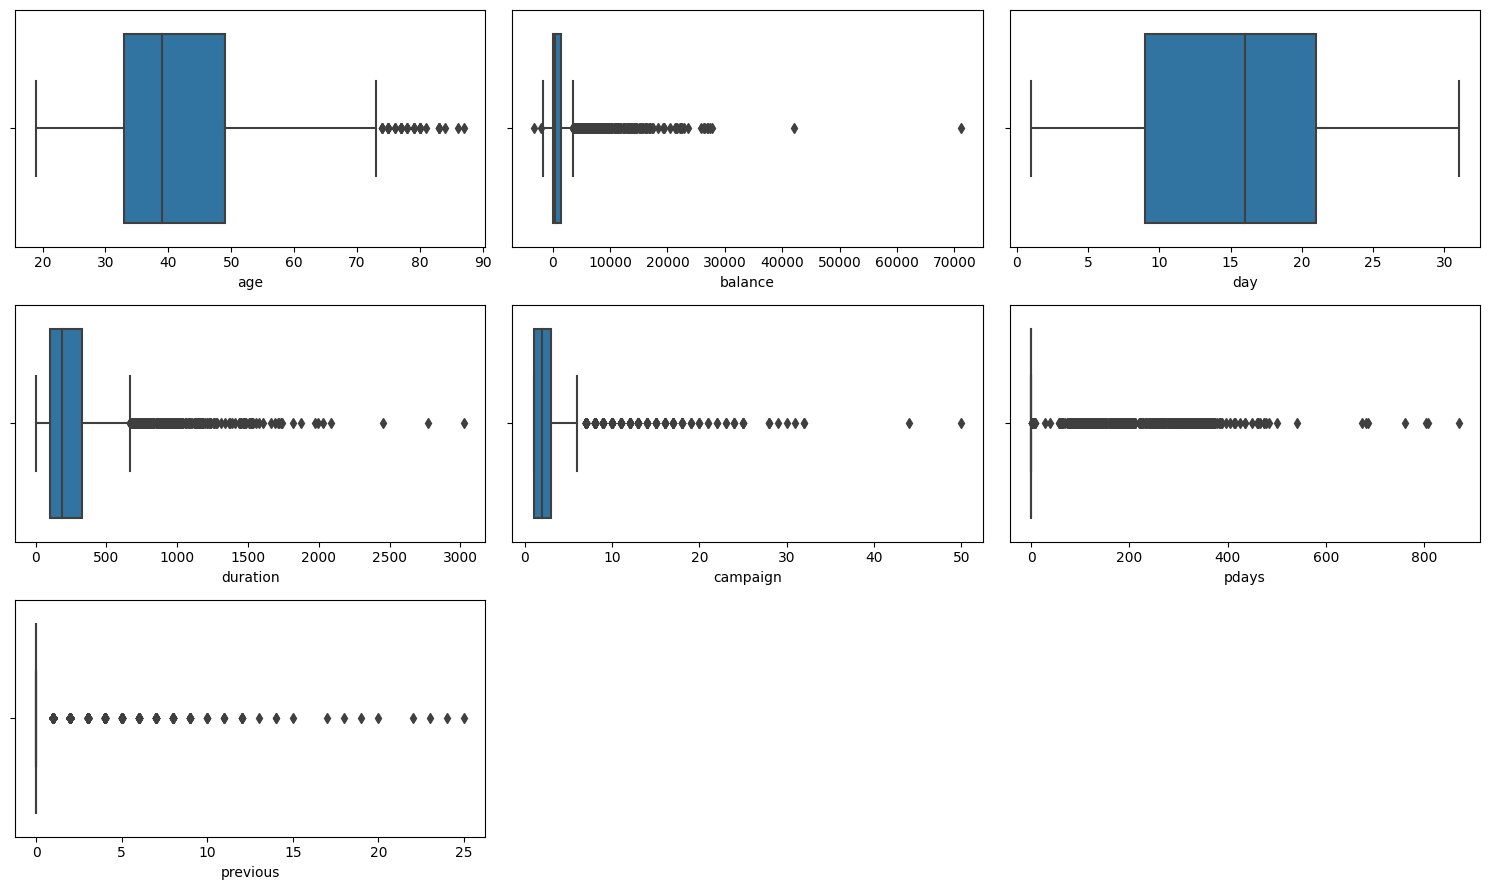

In [ ]:
cols = 3
rows = 3
num_cols = bank_df.select_dtypes(include='number').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=bank_df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

From the Box plots above we can make the following observations
- Most customers lie withing 35 to 50 years of Age. With a few outliers above 70 years. 
- Most Customers have a balance of below 5000 USD
- The duration of most calls is below 500 seconds to make a decision with outliers who needed a call duriation of upto 2500 seconds and 3000 seconds. 
- The Campaigns box plot shows that most customers did not need mre than 5 contacts to make a decision. We however had a few outliers, some needing upto 50 contacts to make a decision. 
- Pdays and previous have too many unique values. 


**Categorical Features**

In [ ]:
#lets get more inforation about our categorical Features including our target. 
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


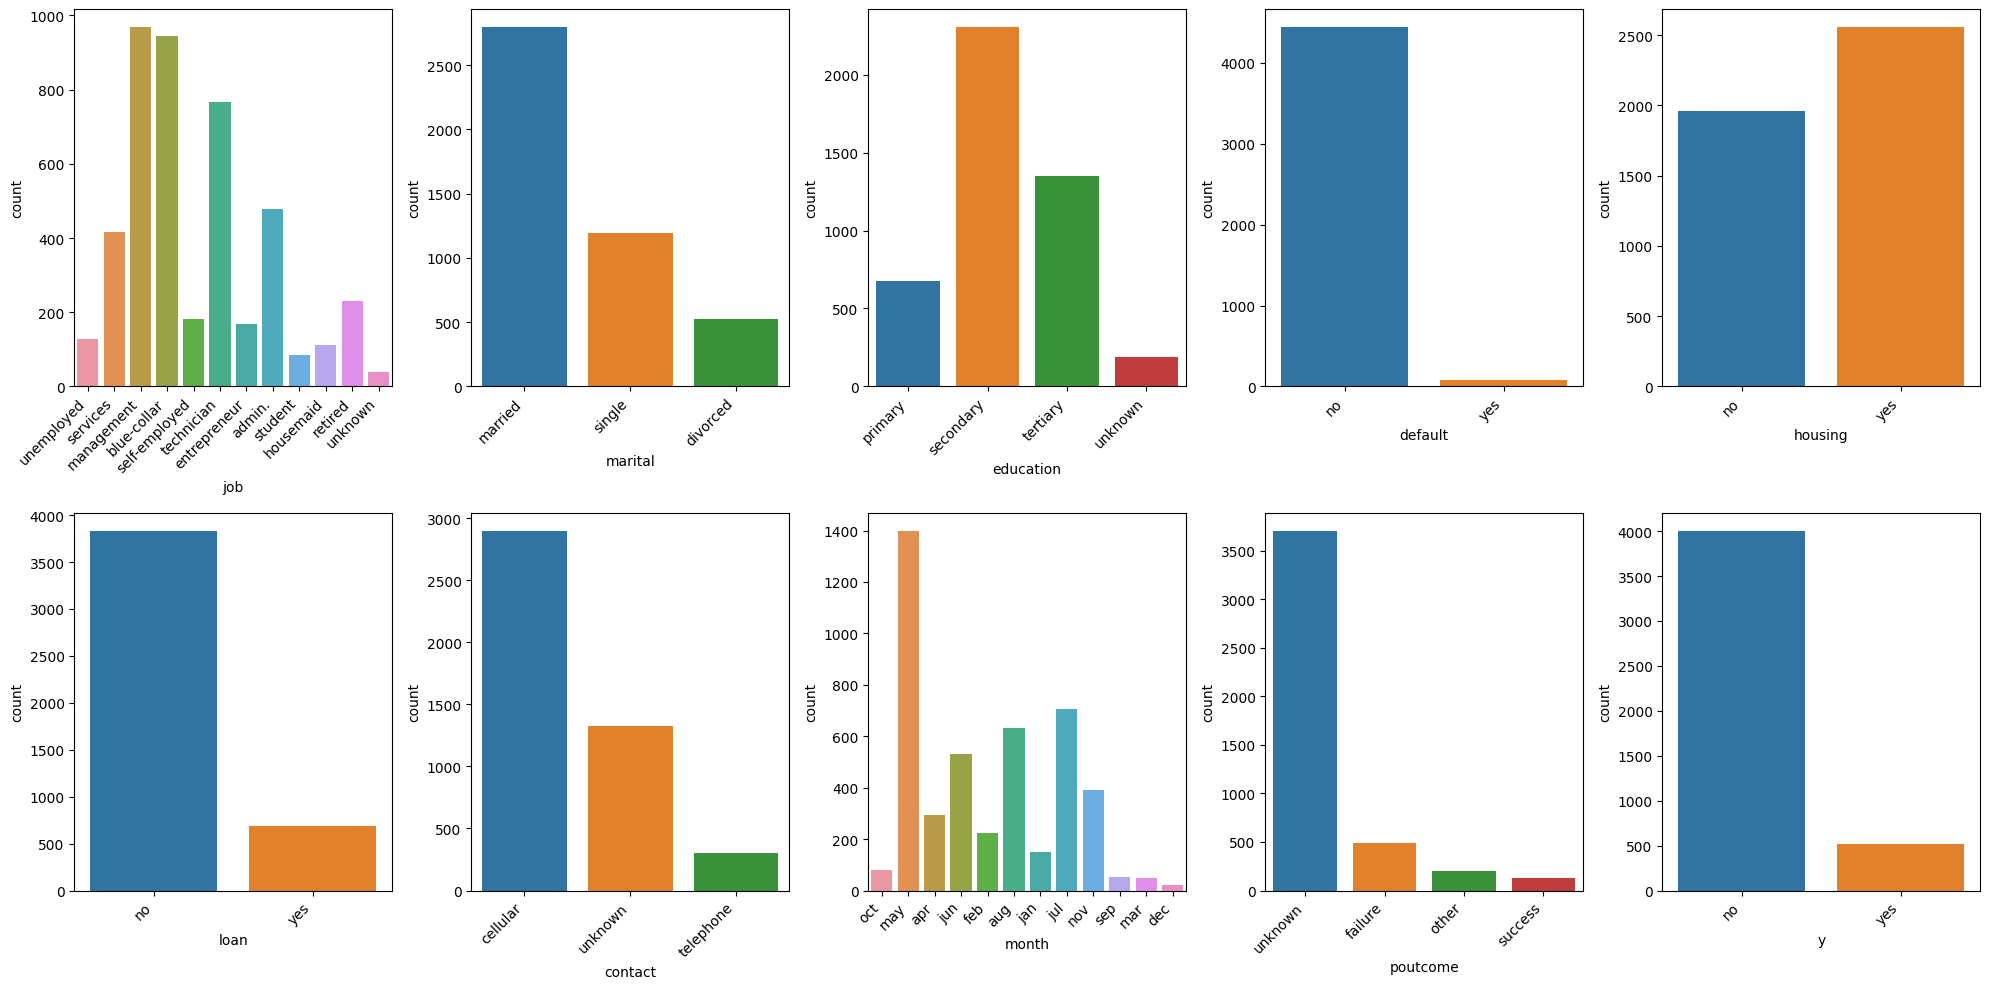

In [ ]:
#lets visualize our categorical features
cols = 5
rows = 2
all_cats = bank_df.select_dtypes(include='object').columns
fig = plt.figure(figsize= (20,10))

for i, col in enumerate(all_cats):
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=bank_df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

From our Visualization above we can make the following obserations
- The top 3 Jobs were Management, blue collar and technician
- Most of the bank customers are Married
- The most common level of education is Secondary
- Most customers have a housing loan with the bank. 
- Most customers do not default on their current loans. 
- Most of the customers also don't have personal loans.
- Most customer's contacts are by celluar.
- The most frequent contact month is May. 

Lets plot a pie charts for Marital Status, Contacts and education level of the bank customers.

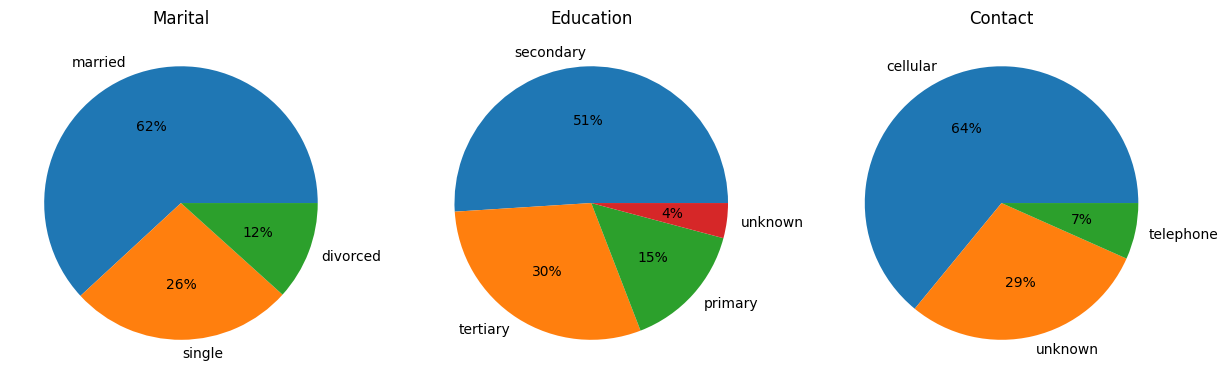

In [ ]:
#get the value counts for each column. 
marital = bank_df['marital'].value_counts()
education = bank_df['education'].value_counts()
contact = bank_df['contact'].value_counts()

fig,ax = plt.subplots(1,3, figsize = (15,5))
ax[0].pie(marital, labels=marital.index,autopct="%.0f%%");
ax[1].pie(education, labels=education.index,autopct="%.0f%%");
ax[2].pie(contact, labels=contact.index,autopct="%.0f%%");

ax[0].set_title('Marital')
ax[1].set_title('Education')
ax[2].set_title('Contact')

plt.show()

From the above Visualizatio we can make the following observations.
- 62% of the customers are married, compared to 12% Divorced and 26% Single
- 51% of the customers had Secondary Education Level, compared to 30% Tertiary Level and 15% Primary Level
- 64% of the Customers used Cellular Contact compared to 7% Telephone and 29% Unknown.

# Part 3

# Exploration (continued)

For this part of the project, you will continue your EDA by 
- Identifying any moderate or strong correlations between your target and your features and/or between one feature and another
- Creating multivariate exploratory visuals to further understand your data



- From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality.  Be sure to explain the finding associated with each visual.  (NO histograms, boxplots, or correlation plots)

In [ ]:
#find correlations in the data set.
corr = bank_df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


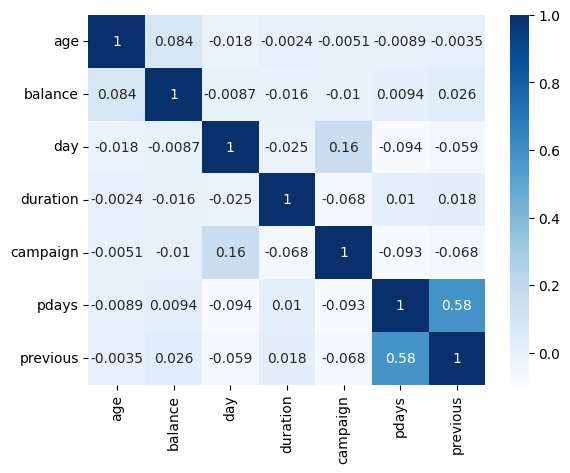

In [ ]:
#let draw a heatmap with annotations to visualize this
sns.heatmap(corr,cmap = "Blues", annot = True);

Most of the features have weak correlations with one another apart from 
pdays and previous wich have a moderate positive correlation with one another. 

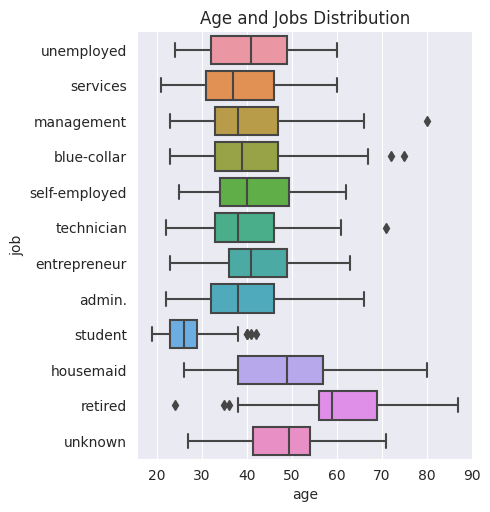

In [ ]:
#Visualize Distribution of Age and Job Types
sns.set_style('darkgrid')
age_job = sns.catplot(x = 'age', y = 'job', kind = 'box', data = bank_df)
plt.title('Age and Jobs Distribution');


From the Visualization above we can see that distribution of Age from different Job types. 
- As expected,most customers who are retired are between 60 and 70 years
- Customers in Management are within 30 and 50 years of age. 

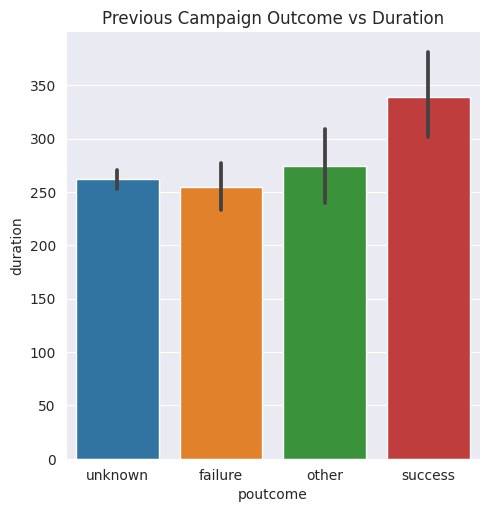

In [ ]:
#Visualize Previous Campaign Outcome Vs Call Duration
sns.set_style('darkgrid')
pout_duration = sns.catplot(x = 'poutcome', y = 'duration', kind = 'bar', data = bank_df)
plt.title('Previous Campaign Outcome vs Duration');

From the Visualization above
- Longer Call durations had a higher success rate from the previous campaign

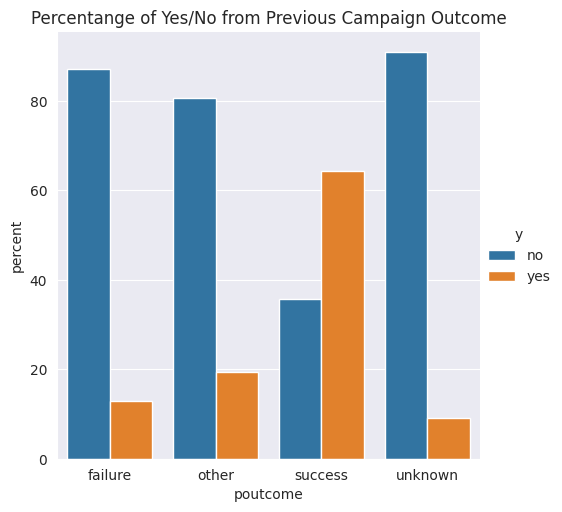

In [ ]:
#Lets see the distribution of customers who said Yes depending on Previous Campaign Outcome

x,y, = 'poutcome', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1= df1.rename('percent').reset_index()
sns.set_style('darkgrid')
sns.catplot(x=x,y='percent',hue =y, kind='bar', data=df1)

plt.title('Percentange of Yes/No from Previous Campaign Outcome');

From the visualization above we can see that the customers who said yes to the  Previous Campain had a higher percentange of saying yes to the Current Term Deposit Campaign

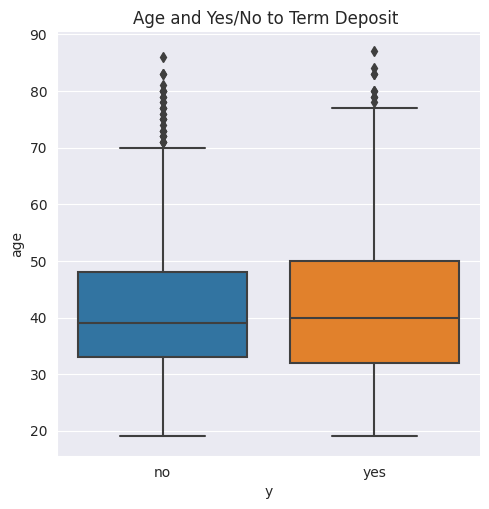

In [ ]:
#Visualize Distribution of Age and Yes/No to Term Deposit 
sns.set_style('darkgrid')
age_y = sns.catplot(x = 'y', y = 'age', kind = 'box', data = bank_df)
plt.title('Age and Yes/No to Term Deposit ');


From the visualization above, the average age of those who said yes to the Term Deposit seems the same, although its so slightly higher than those who said NO.

- From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality. Be sure to explain the finding associated with each visual. (NO histograms, boxplots, or correlation plots)

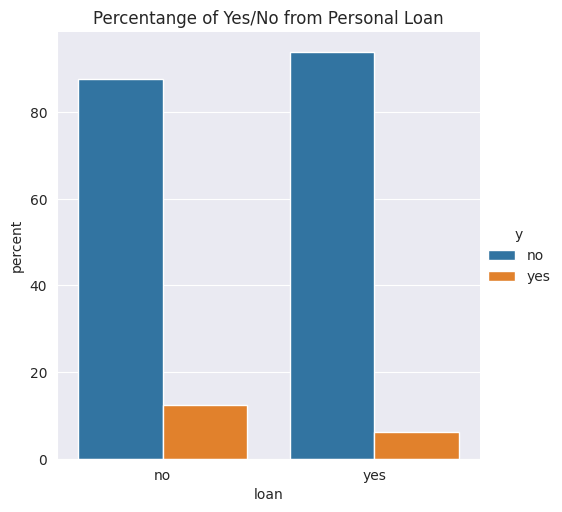

In [ ]:
#Lets see the distribution of customers who said Yes depending on if they had a Personal LOan

x,y, = 'loan', 'y'

df2 = bank_df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2= df2.rename('percent').reset_index()
sns.set_style('darkgrid')
sns.catplot(x=x,y='percent',hue =y, kind='bar', data=df2)

plt.title('Percentange of Yes/No from Personal Loan');

From the visualization above we can see that a personal loan doesn't have an impact on whether the customer will say yes to a term deposit or No.

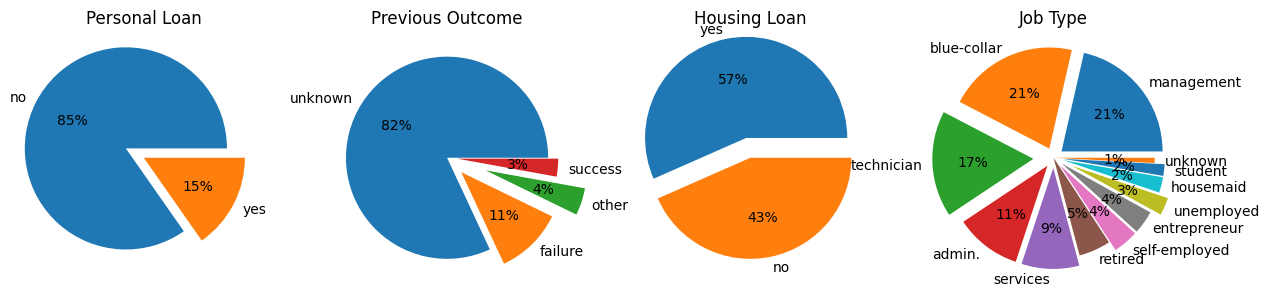

In [ ]:
#We'll creaate pie charts for some of the categorical features.

#get the value counts for each column. 
poutcome = bank_df['poutcome'].value_counts()
housing = bank_df['housing'].value_counts()
job = bank_df['job'].value_counts()
loan = bank_df['loan'].value_counts()

loan_explode = [0.2,0]
pout_explode = [0,0.2,0.4,0.1]
job_explode = [0.1,0.1,0.2,0.1,0.1,0,0.1,0.1,0.2,0.1,0.1,0]

fig,ax = plt.subplots(1,4, figsize = (15,5))
ax[0].pie(loan, labels=loan.index,autopct="%.0f%%", explode = loan_explode);
ax[1].pie(poutcome, labels=poutcome.index,autopct="%.0f%%",explode = pout_explode);
ax[2].pie(housing, labels=housing.index,autopct="%.0f%%", explode = loan_explode);
ax[3].pie(job, labels = job.index,autopct="%.0f%%", explode = job_explode)

ax[0].set_title('Personal Loan')
ax[1].set_title('Previous Outcome')
ax[2].set_title('Housing Loan')
ax[3].set_title('Job Type')

plt.show()

From the above visualization we can make the following observiations
- 85 percent of customers don't have a personal loan
- We do not know the previous outcome of the previous campaign for 82 percent of the customers
- 57% of the Customers have a Housing Loan
- The most common job type for our customers is Blue Collar and Managemnt Jobs with 21%

# Part 4

# Pre-processing

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
#import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA

In [4]:
#To supress future warnings
#source https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


From our Data source we were given the following information 
Important note: 'Duration' attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


Apart from that, the data was pre-cleaned. 

In [5]:
#lets see the value counts of the target 
bank_df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

The above results show that the target is very imbalanced so it will affect our model's results. 

In [6]:
#convert target to Numeric values
bank_df['y'] = bank_df['y'].replace({'no':0, 'yes':1})

In [7]:
#define features X and target y 
X = bank_df.drop(columns =['y','duration'])
y = bank_df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42, stratify =y )


In [8]:
#create selector for Categorical values
cat_selector = make_column_selector(dtype_include ='object')

In [9]:
#scaler
scaler = StandardScaler()

#Instatiate OneHot Encoder
ohe = OneHotEncoder(handle_unknown ='ignore', sparse = False)

In [10]:
#create a tuple to One Hot Encode the categorical data. 
cat_tuple = (ohe, cat_selector)


#Column Transformer for Categorical Data
prep_tranformer = make_column_transformer(cat_tuple)


#make pipeline that Ohe Hot Encodes the Categorical Data then Scales the data for our model 
prep_pipe = make_pipeline(prep_tranformer,scaler)

# Logistic Regression Model

In [11]:
#instantiate Logistic Regression Classifier with default parameters
logreg = LogisticRegression()

#create pipe with the preprocessor
logreg_pipe = make_pipeline(prep_pipe,logreg)
logreg_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d1bd1f970>)])),
                                 ('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [ ]:
#fit the Logistic Regression Model
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [ ]:
#Get the Logistic Regression Score
print(logreg_pipe.score(X_train,y_train))
print(logreg_pipe.score(X_test,y_test))

0.8915929203539823
0.8901989683124539


In [ ]:
#lets generate a classification report for our default Linear Regresssion model

#make predictions
logreg_pipe_default_preds = logreg_pipe.predict(X_test)

#print A Classification Report
print(classification_report(y_test,logreg_pipe_default_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.54      0.14      0.23       152

    accuracy                           0.89      1357
   macro avg       0.72      0.56      0.58      1357
weighted avg       0.86      0.89      0.86      1357



Tuning the Logistic Regression Model

In [ ]:
#create grid to set parameters for tuning the LogisticRegression Model 
logreg_pipe_param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
                   'logisticregression__penalty': ['l1'],
                   'logisticregression__solver':['liblinear']
                   }

In [ ]:
%%time
#create GridSearchCV and add logreg_pipe with the parameter grid
logreg_pipe_gs = GridSearchCV(logreg_pipe,logreg_pipe_param_grid)

#fit GridSearchCV onto Training Data
logreg_pipe_gs.fit(X_train,y_train)

print(f'The Best Hyper paremeters are {logreg_pipe_gs.best_params_}')

best_logreg_pipe = logreg_pipe_gs.best_estimator_

#Make Predictions using the best parameters
best_logreg_pipe__preds = best_logreg_pipe.predict(X_test)

#print A Classification Report
print(classification_report(y_test,best_logreg_pipe__preds))



The Best Hyper paremeters are {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.58      0.14      0.22       152

    accuracy                           0.89      1357
   macro avg       0.74      0.56      0.58      1357
weighted avg       0.87      0.89      0.86      1357

CPU times: user 10.5 s, sys: 2.32 s, total: 12.8 s
Wall time: 10.4 s


Tuning using the GridSearch CV didn't improve the f1-score

In [ ]:
#instatiate PCA to add some dimensionality reduction
pca = PCA(n_components=.95)

#instatiate tuned Logistic regression Model 

log_reg_tuned = LogisticRegression(C= 0.1,penalty =  'l1', solver =  'liblinear')
#make a pipeline with Logisitc Regression and PCA
log_pca = make_pipeline(prep_pipe,pca,log_reg_tuned)

In [ ]:
log_pca.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [ ]:
#Get the Logistic Regression Score
print(log_pca.score(X_train,y_train))
print(log_pca.score(X_test,y_test))

0.8915929203539823
0.8938835666912307


The test score was slight increased from 89.0 to 89.3

In [ ]:
#lets generate a classification report for our default Linear Regresssion model

#make predictions
logreg_pipe_pca_preds = log_pca.predict(X_test)

#print A Classification Report
print(classification_report(y_test,logreg_pipe_pca_preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.65      0.11      0.19       152

    accuracy                           0.89      1357
   macro avg       0.78      0.55      0.57      1357
weighted avg       0.87      0.89      0.86      1357



Still the f1-score doesn't improve. However  the precision score improved on the positive class. 

# Random Forrest Classifier

In [ ]:
#import Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier

#instantiate random Forrest Classifier
rfc = RandomForestClassifier()


#create pipe with the preprocessor
rfc_pipe = make_pipeline(prep_pipe,rfc)
rfc_pipe


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
rfc_pred = rfc_pipe.predict(X_test)

In [ ]:
#Get the Random Forest Score
print(rfc_pipe.score(X_train,y_train))
print(rfc_pipe.score(X_test,y_test))

0.9516434892541087
0.8806190125276345


The Randfom Forest Model with the default parameters increases the overfitting on the Data Set.

In [ ]:
#print A Classification Report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1205
           1       0.41      0.16      0.23       152

    accuracy                           0.88      1357
   macro avg       0.66      0.56      0.58      1357
weighted avg       0.85      0.88      0.86      1357



Random Forest Classifier has a better f1-score than the Logisitic Regression Model. 

In [ ]:
rfc_pipe.get_params()

In [ ]:
#create a grid of parameters to test for the Random Forest Model
rf_param_grid = { 'randomforestclassifier__max_depth': range(1,15),
              'randomforestclassifier__n_estimators': range(50,500,50),
              'randomforestclassifier__random_state': [42]}

In [ ]:
%%time
#create GridSearchCV and add the Random Forest Model with the parameter grid
rf_gs = GridSearchCV(rfc_pipe, rf_param_grid)

#fit rf_gs onto Training data. 
rf_gs.fit(X_train, y_train)

print('Best RF Parameters:')


print(rf_gs.best_params_)


best_rf_pipe = rf_gs.best_estimator_

#Make Predictions using the best parameters
best_rf__preds = best_rf_pipe.predict(X_test)


#creat a pipeline with the best parameters
rf_best_model = rf_gs.best_estimator_

#print A Classification Report
print(classification_report(y_test,best_rf__preds))

Best RF Parameters:
{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 42}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.56      0.10      0.17       152

    accuracy                           0.89      1357
   macro avg       0.73      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357

CPU times: user 7min 28s, sys: 2.18 s, total: 7min 30s
Wall time: 7min 35s


The f1-score on the positive class has decreased even after tuning the Random Forest Model. 

# XGB Classifier

In [ ]:
#instantiate XGB 
xgb = XGBClassifier()

#create pipe with XGB
xgb_pipe = make_pipeline(prep_pipe,pca,xgb)
xgb_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('xgbclassifier',
                 XGBClassifie...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
#fit our xgb model
xgb_pipe.fit(X_train,y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('xgbclassifier',
                 XGBClassifie...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
#get XGB model Score
print(xgb_pipe.score(X_train,y_train))
print(xgb_pipe.score(X_test,y_test))

0.9516434892541087
0.8732498157700811


In [ ]:
#make predictions
xgb_preds = xgb_pipe.predict(X_test)

#print A Classification Report
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1205
           1       0.34      0.14      0.20       152

    accuracy                           0.87      1357
   macro avg       0.62      0.55      0.57      1357
weighted avg       0.84      0.87      0.85      1357



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#instatiate KNN Model

knn = KNeighborsClassifier()


#make knn pipe

knn_pipe = make_pipeline(prep_pipe,knn)

#fit knn_pipe on data

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfc66f0f70>)])),
                                 ('standardscaler', StandardScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
#get KNN model Score
print(knn_pipe.score(X_train,y_train))
print(knn_pipe.score(X_test,y_test))

0.899810366624526
0.8806190125276345


Tuning KNN Model

In [ ]:
#create grid to set parameters for tuning the KNN Model
knn_pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,20),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [ ]:
%%time
#create GridSearchCV and add logreg_pipe with the parameter grid
knn_pipe_gs = GridSearchCV(knn_pipe, knn_pipe_param_grid)

#fit knn_pipe_gs onto Training data. 
knn_pipe_gs.fit(X_train, y_train)

print('Best KNN Parameters:')


print(knn_pipe_gs.best_params_)


#creat a pipeline with the best parameters
knn_best_pipe = knn_pipe_gs.best_estimator_

print(f'Training Accuracy of best KNN model is: {knn_best_pipe.score(X_train, y_train)}')
print(f'Test Accuracy of best KNN model is: {knn_best_pipe.score(X_test, y_test)}')

knn_best_preds = knn_best_pipe.predict(X_test)


#print A Classification Report
print(classification_report(y_test,knn_best_preds))

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'uniform'}
Training Accuracy of best KNN model is: 0.9026548672566371
Test Accuracy of best KNN model is: 0.8820928518791452
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1205
           1       0.43      0.15      0.22       152

    accuracy                           0.88      1357
   macro avg       0.66      0.56      0.58      1357
weighted avg       0.85      0.88      0.86      1357

CPU times: user 12min 24s, sys: 843 ms, total: 12min 25s
Wall time: 7min 14s


# Model Comparison

In [ ]:
print('Logistic Regression')

#print A Classification Report
print(classification_report(y_test,best_logreg_pipe__preds))

print('Random Forest Model')
#print A Classification Report
print(classification_report(y_test,best_rf__preds))

print('XGB')

#print A Classification Report
print(classification_report(y_test,xgb_preds))

print('KNN')
#print A Classification Report
print(classification_report(y_test,knn_best_preds))

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.58      0.14      0.22       152

    accuracy                           0.89      1357
   macro avg       0.74      0.56      0.58      1357
weighted avg       0.87      0.89      0.86      1357

Random Forest Model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.56      0.10      0.17       152

    accuracy                           0.89      1357
   macro avg       0.73      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357

XGB
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1205
           1       0.34      0.14      0.20       152

    accuracy                           0.87      1357
   macro avg       0.62      0.55      0.57      1357
weighted avg       0.84      0

The Logistic Regression Model and the KNN Model have the highest F1-scores of 0.22. Although this is not good they can be tuned to increase the model's performance.

We shall further tune the Logistic Regression Model. 

# Final Model ( Logistic Regression)




In [12]:
#tuning Logistic Regression Model
lr_param_grid = {'logisticregression__max_iter': [20, 50, 100, 200, 500,1000,4000],                      
                  'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
                  'logisticregression__class_weight': ['balanced'],
                 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000]
}                                 

In [13]:
%%time
#create GridSearchCV and add logreg_pipe with the parameter grid
logreg_pipe_gs_tune = GridSearchCV(logreg_pipe,lr_param_grid)

#fit GridSearchCV onto Training Data
logreg_pipe_gs_tune.fit(X_train,y_train)

print(f'The Best Hyper paremeters are {logreg_pipe_gs_tune.best_params_}')

tune_logreg_pipe = logreg_pipe_gs_tune.best_estimator_

#Make Predictions using the best parameters
tuned_logreg_pipe__preds = tune_logreg_pipe.predict(X_test)

#print A Classification Report
print(classification_report(y_test,tuned_logreg_pipe__preds))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

The Best Hyper paremeters are {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 100, 'logisticregression__solver': 'sag'}
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      1201
           1       0.22      0.57      0.32       156

    accuracy                           0.72      1357
   macro avg       0.58      0.66      0.57      1357
weighted avg       0.85      0.72      0.77      1357

CPU times: user 8min 46s, sys: 1min 25s, total: 10min 12s
Wall time: 8min 50s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
print(f'The Best Hyper paremeters are {logreg_pipe_gs_tune.best_params_}')

tune_logreg_pipe = logreg_pipe_gs_tune.best_estimator_

#Make Predictions using the best parameters
tuned_logreg_pipe__preds = tune_logreg_pipe.predict(X_test)

#print A Classification Report
print(classification_report(y_test,tuned_logreg_pipe__preds))


The Best Hyper paremeters are {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 100, 'logisticregression__solver': 'sag'}
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      1201
           1       0.22      0.57      0.32       156

    accuracy                           0.72      1357
   macro avg       0.58      0.66      0.57      1357
weighted avg       0.85      0.72      0.77      1357



With Tuning, The Logistic Regression Model's f1-score was improved from 0.22 to  0.32. It's still not a very good performing model, but it is an improvement.

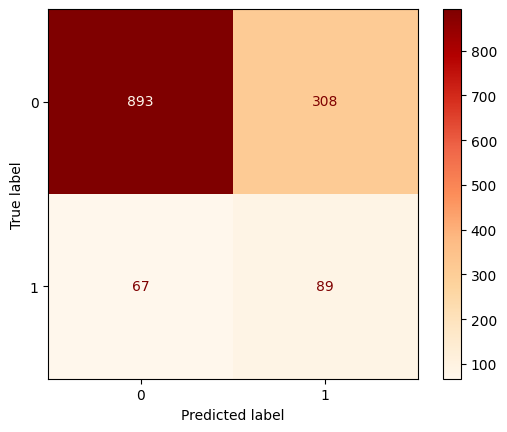

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, tuned_logreg_pipe__preds, cmap='OrRd');

# PCA

In [40]:
#instatiate PCA
pca = PCA(n_components=0.95)


#make pipeline that Ohe Hot Encodes the Categorical Data then Scales the data for our model 
prep_pipe_pca = make_pipeline(prep_tranformer,scaler,pca)
prep_pipe_pca

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d1bd1f970>)])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95))])

In [41]:
#transform and X_train and _X_test 
X_train_pca = prep_pipe_pca.fit_transform(X_train)

X_test_pca = prep_pipe_pca.transform(X_test)

In [19]:
#Import Libraries

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

In [20]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

# **Keras Model**

In [42]:
#save number of features as the input shape
input_shape = X_train_pca.shape[1]
input_shape

32

In [44]:
#instantiate 1st model
model = Sequential()

#add first layer
model.add(Dense(32,input_dim = input_shape,activation ='relu'))

#second layer
model.add(Dense(15,activation ='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [45]:
#compile model with metrics
model.compile(loss='bce',optimizer ='adam', metrics =['accuracy',
                                                      metrics.Precision(),
                                                      metrics.Recall()])

In [46]:
history = model.fit(X_train_pca,y_train,
                    validation_data=(X_test_pca,y_test),
                    epochs=100,
                    verbose=0)

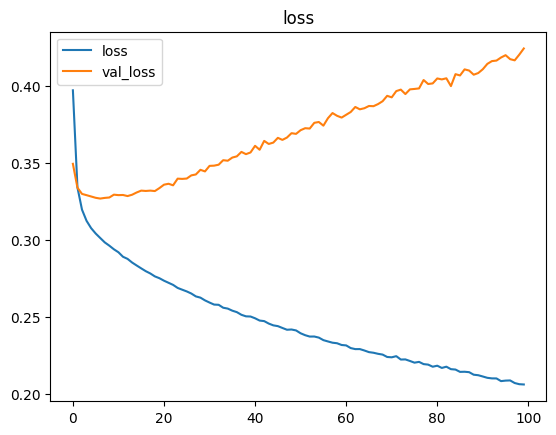

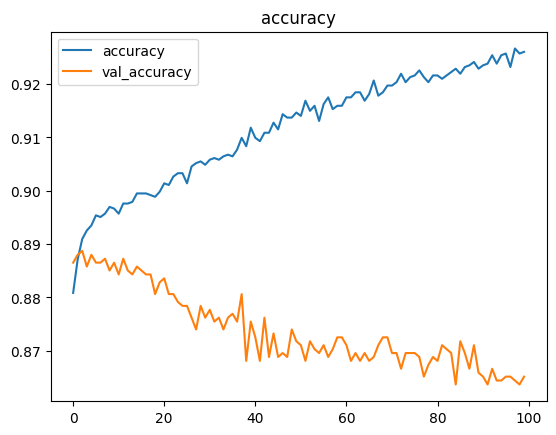

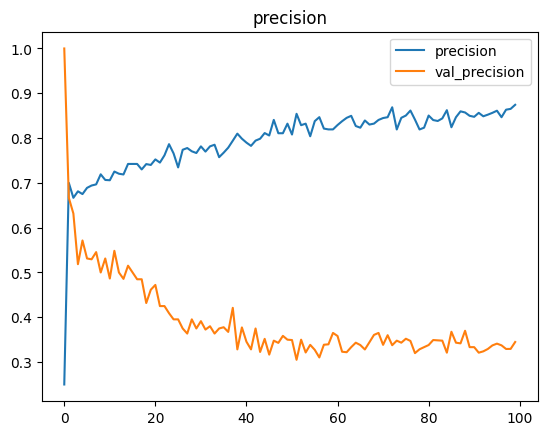

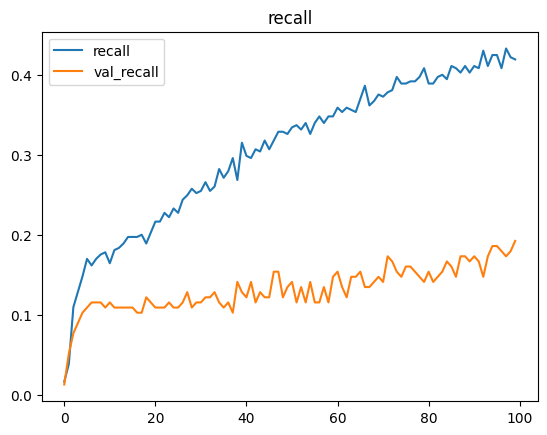

In [25]:
# plot learning history
plot_history(history)

43/43 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1201
           1       0.34      0.19      0.25       156

    accuracy                           0.87      1357
   macro avg       0.62      0.57      0.59      1357
weighted avg       0.84      0.87      0.85      1357



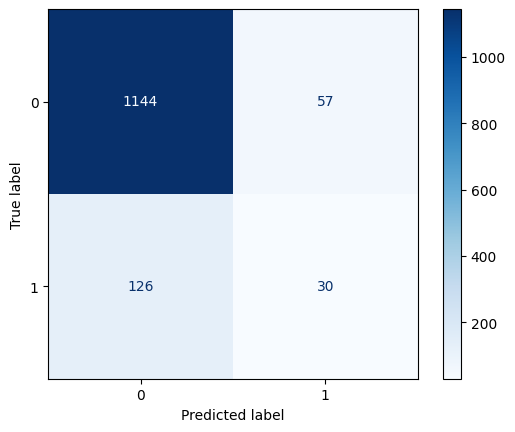

In [26]:
# evaluate model
 
#make predictions
y_preds = model.predict(X_test_pca)
 
# round the predictions
y_preds = np.round(y_preds)
 
print(classification_report(y_test, y_preds))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

# Version 2 of Keras Model with Regularization

In this model 
- We shall add Dropout Layers to combat over fitting.
- We shall also reduce neurons and train fewer epochs.

In [47]:
#instantiate Third model
model2 = Sequential()

#add first layer
model2.add(Dense(10,input_dim = input_shape,activation ='relu'))
model2.add(Dropout(0.2))

#second layer
model2.add(Dense(5,activation ='relu'))
model2.add(Dropout(0.2))
#output layer
model2.add(Dense(1,activation='sigmoid'))

In [48]:
# compile model with metrics
model2.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [49]:
#add EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping


#early_stopping = EarlyStopping(patience = 5)

history2 = model2.fit(X_train_pca,y_train,
                    validation_data=(X_test_pca,y_test),
                    epochs=20,
                    #callbacks = [early_stopping],
                    verbose=0)

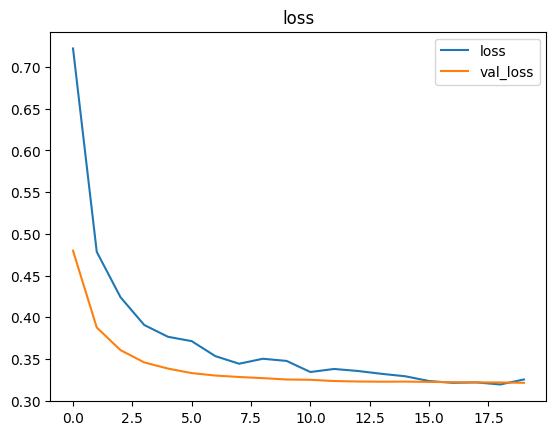

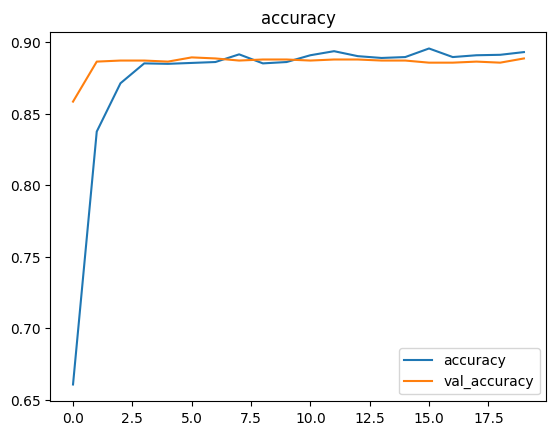

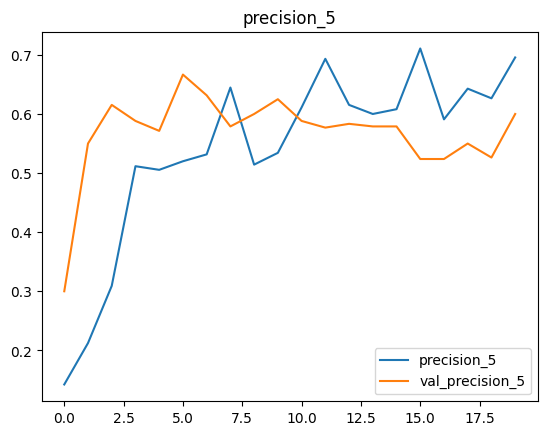

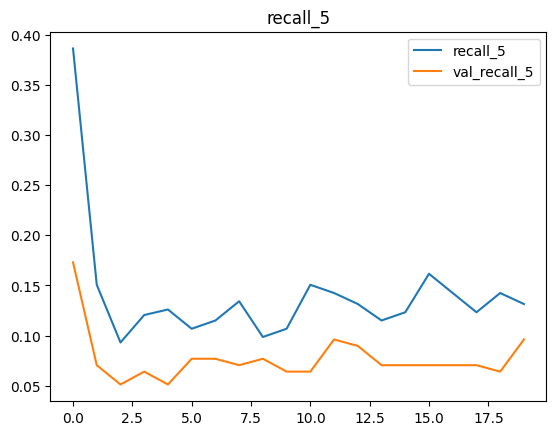

In [50]:
# plot learning history3
plot_history(history2)

43/43 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1201
           1       0.60      0.10      0.17       156

    accuracy                           0.89      1357
   macro avg       0.75      0.54      0.55      1357
weighted avg       0.86      0.89      0.85      1357



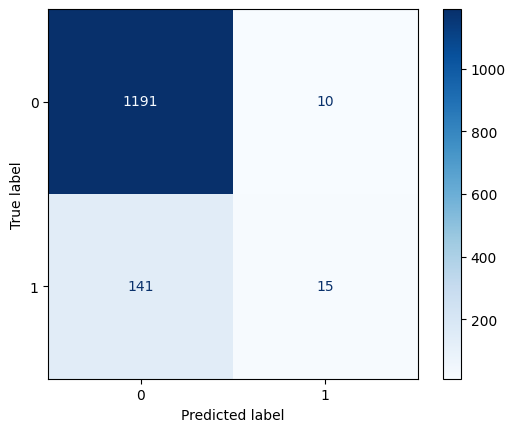

In [51]:
# evaluate model 2
 
#make predictions
y_preds2 = model2.predict(X_test_pca)
 
# round the predictions
y_preds2 = np.round(y_preds2)
 
print(classification_report(y_test, y_preds2))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds2, cmap='Blues');